# Maximum likelyhood estimation analysis 

## AITOFF maps

In [1]:
from os.path import join, expandvars
import shutil
from agilepy.api.AGAnalysis import AGAnalysis
from pathlib import Path

## Data

In [12]:
tmin=58884.0
tmax=58886.0
timetype="MJD"
l=0
b=0

log_index="/AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index"
evt_index="/AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index"

out_dir = expandvars("$HOME/aitoff_analysis/cygnus/output")

work_dir=expandvars("$HOME/aaitoff_analysis/cygnus/conf")


if Path(out_dir).exists():
    print("deleting",out_dir)
    shutil.rmtree(out_dir)


Path(work_dir).mkdir(parents=True, exist_ok=True)


print("Working directory:", work_dir)

deleting /home/rt/aitoff_analysis/cygnus/output
Working directory: /home/rt/aaitoff_analysis/cygnus/conf


The tmin and tmax ISO datas can be converted to MJD or TT with the following web tool: https://tools.ssdc.asi.it/conversionTools

## Configuration file

In [13]:
conf_file_path = join(work_dir,"agilepy_conf.yaml")

In [14]:
conf_file = """
input:
  evtfile: %s
  logfile: %s

output:
  outdir: %s
  filenameprefix: cygnus_analysis
  logfilenameprefix: cygnus_analysis
  verboselvl: 0
  
maps:
  binsize: 1
  expstep: 2
  mapsize: 360
  
selection:
  tmin: %f
  tmax: %f
  timetype: MJD
  glon: %f
  glat: %f
  proj: AIT
  fovradmax: 50
  albedorad: 80
  
  
  
"""%(evt_index, log_index, out_dir, tmin, tmax, l, b)

In [15]:
with open(conf_file_path , "w") as cf:
    cf.write(conf_file)

## Sources file

In [16]:
sources_file_path = join(work_dir,"sources.txt")
print(sources_file_path)

/home/rt/aaitoff_analysis/cygnus/conf/sources.txt


## Starting the analysis

In [17]:
aga = AGAnalysis(conf_file_path, sources_file_path)

In [18]:
#isoBkg, galBkg = aga.calcBkg('CYGX3')
#print("iso:",isoBkg)
#print("gal:",galBkg)

In [19]:
maplistfile = aga.generateMaps()

In [20]:
maps = aga.getSkyMaps()
maps

[['/home/rt/aitoff_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.cts.gz',
  '/home/rt/aitoff_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz',
  '/home/rt/aitoff_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.gas.gz']]

In [21]:
cts_map = maps[0][0]
exp_map = maps[0][1]

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


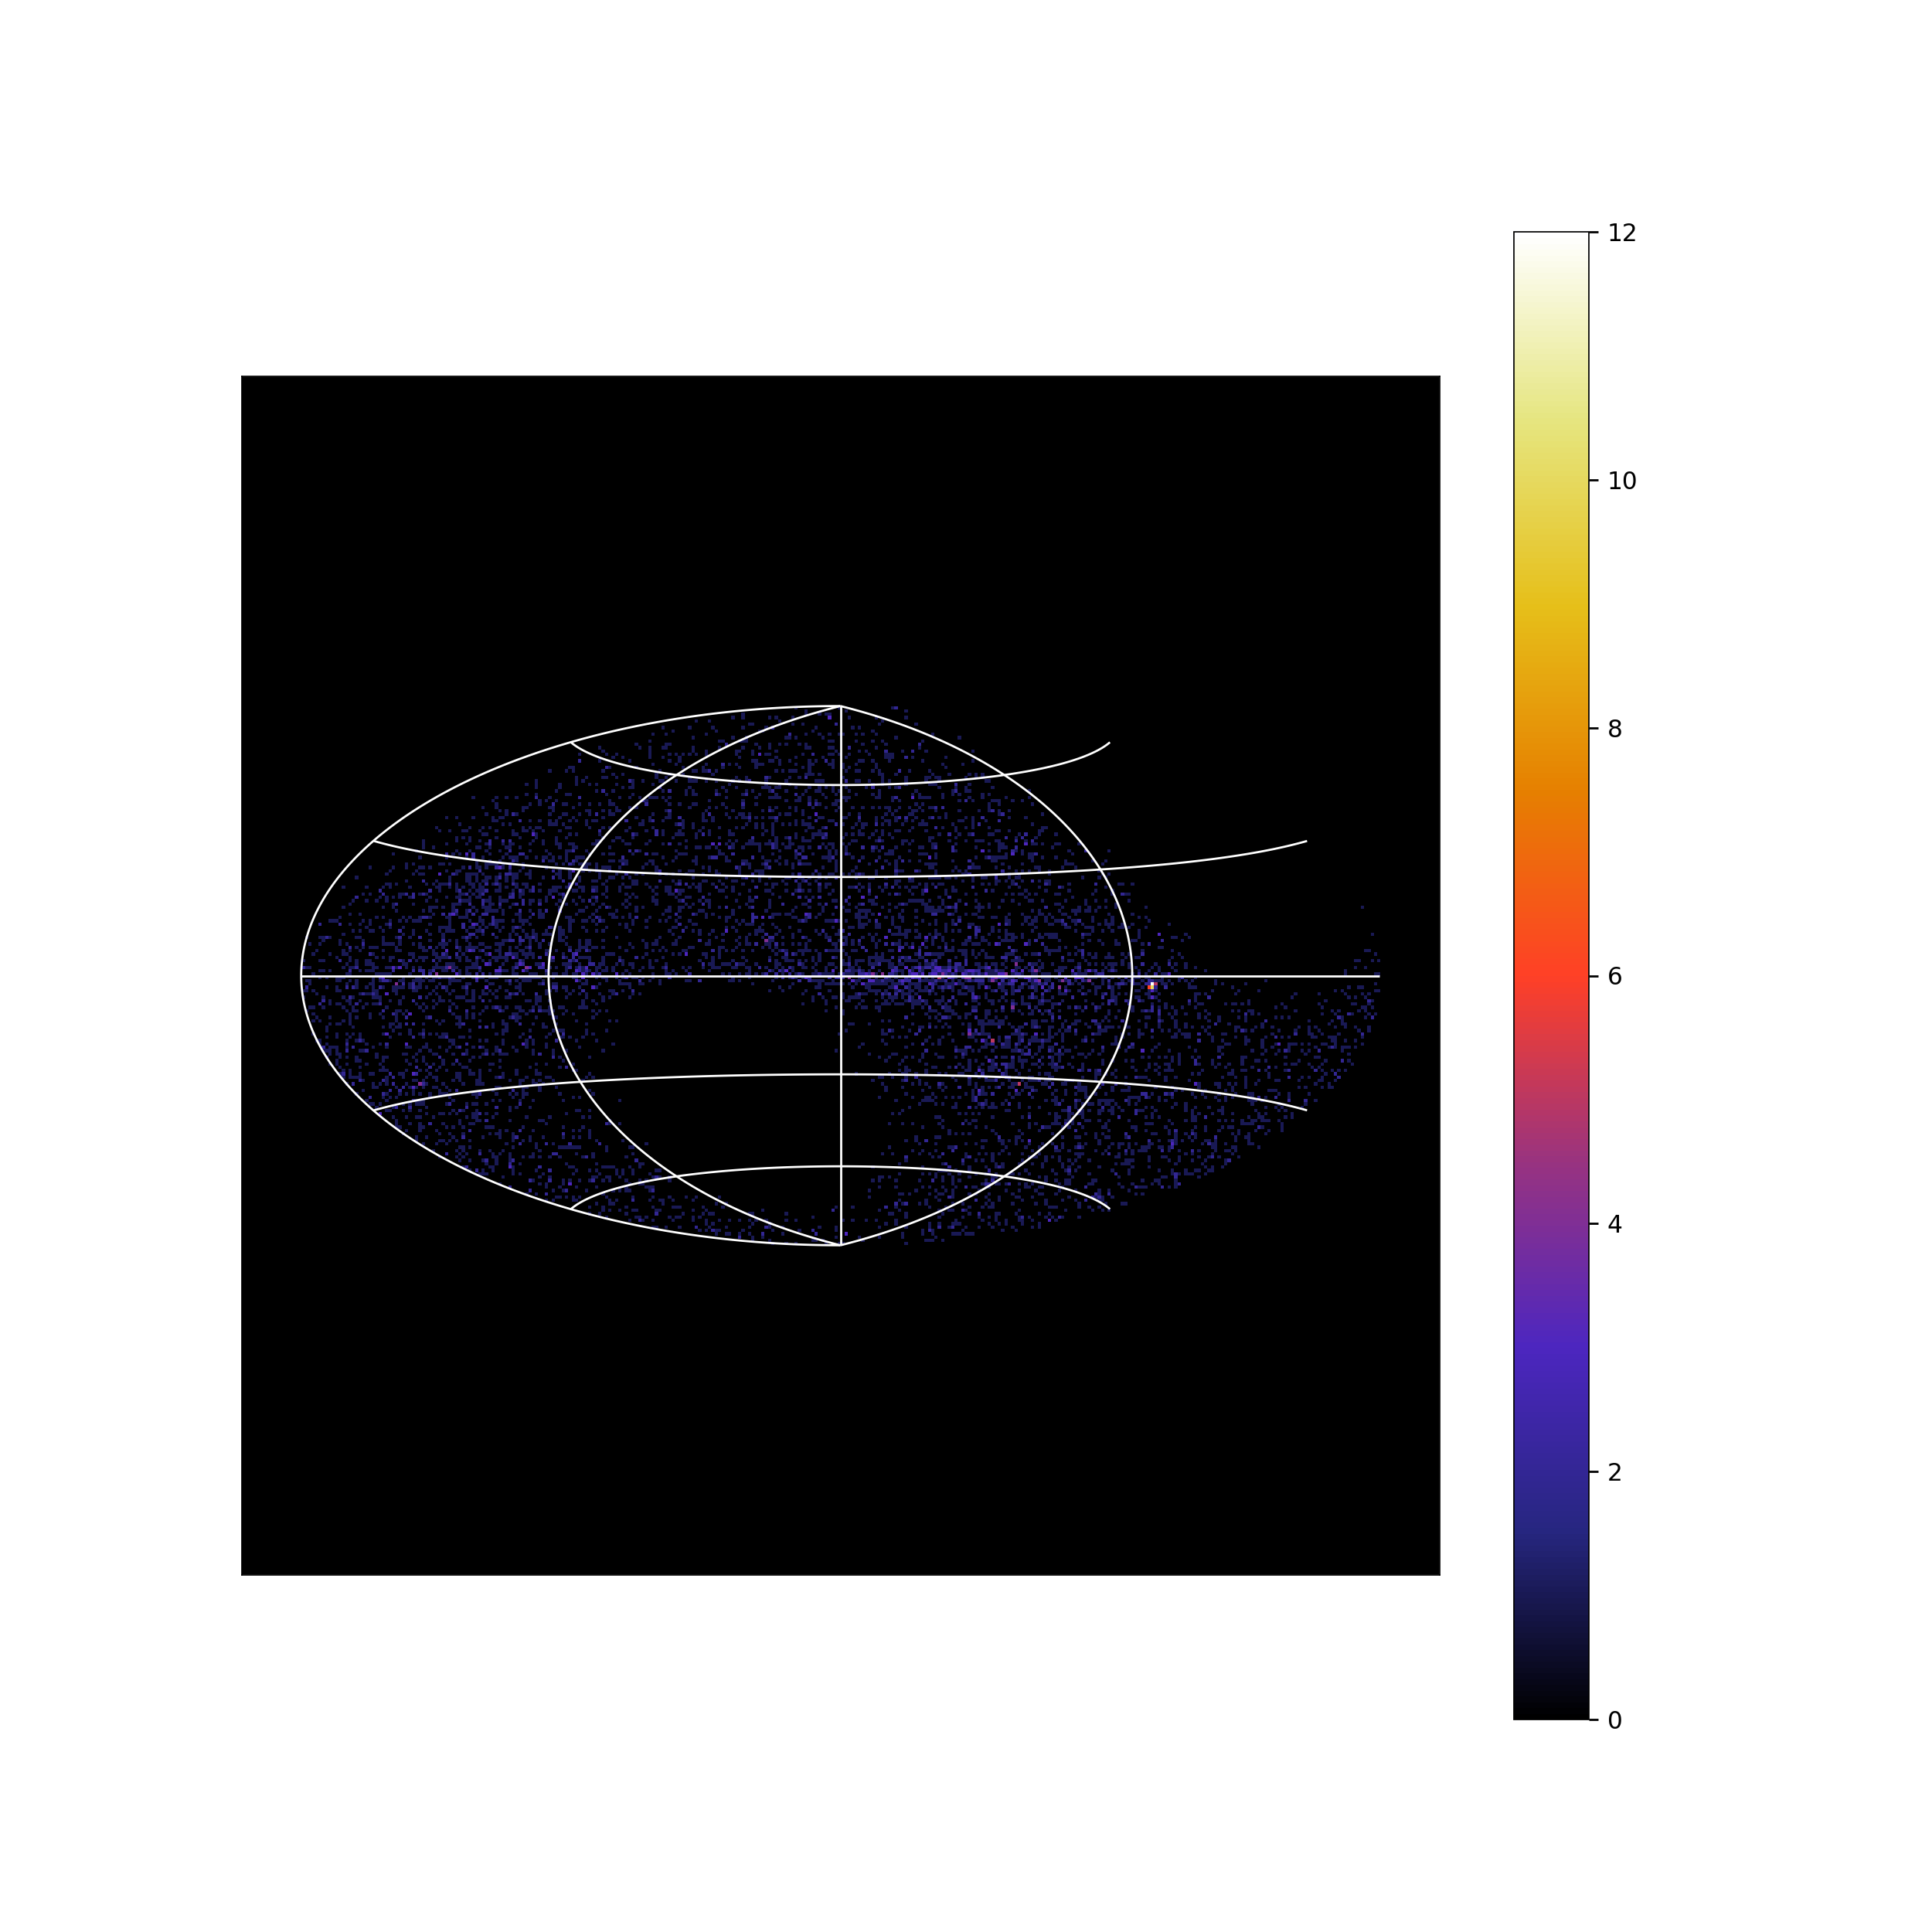

In [23]:
aga.displaySkyMap(cts_map)

<IPython.core.display.Javascript object>


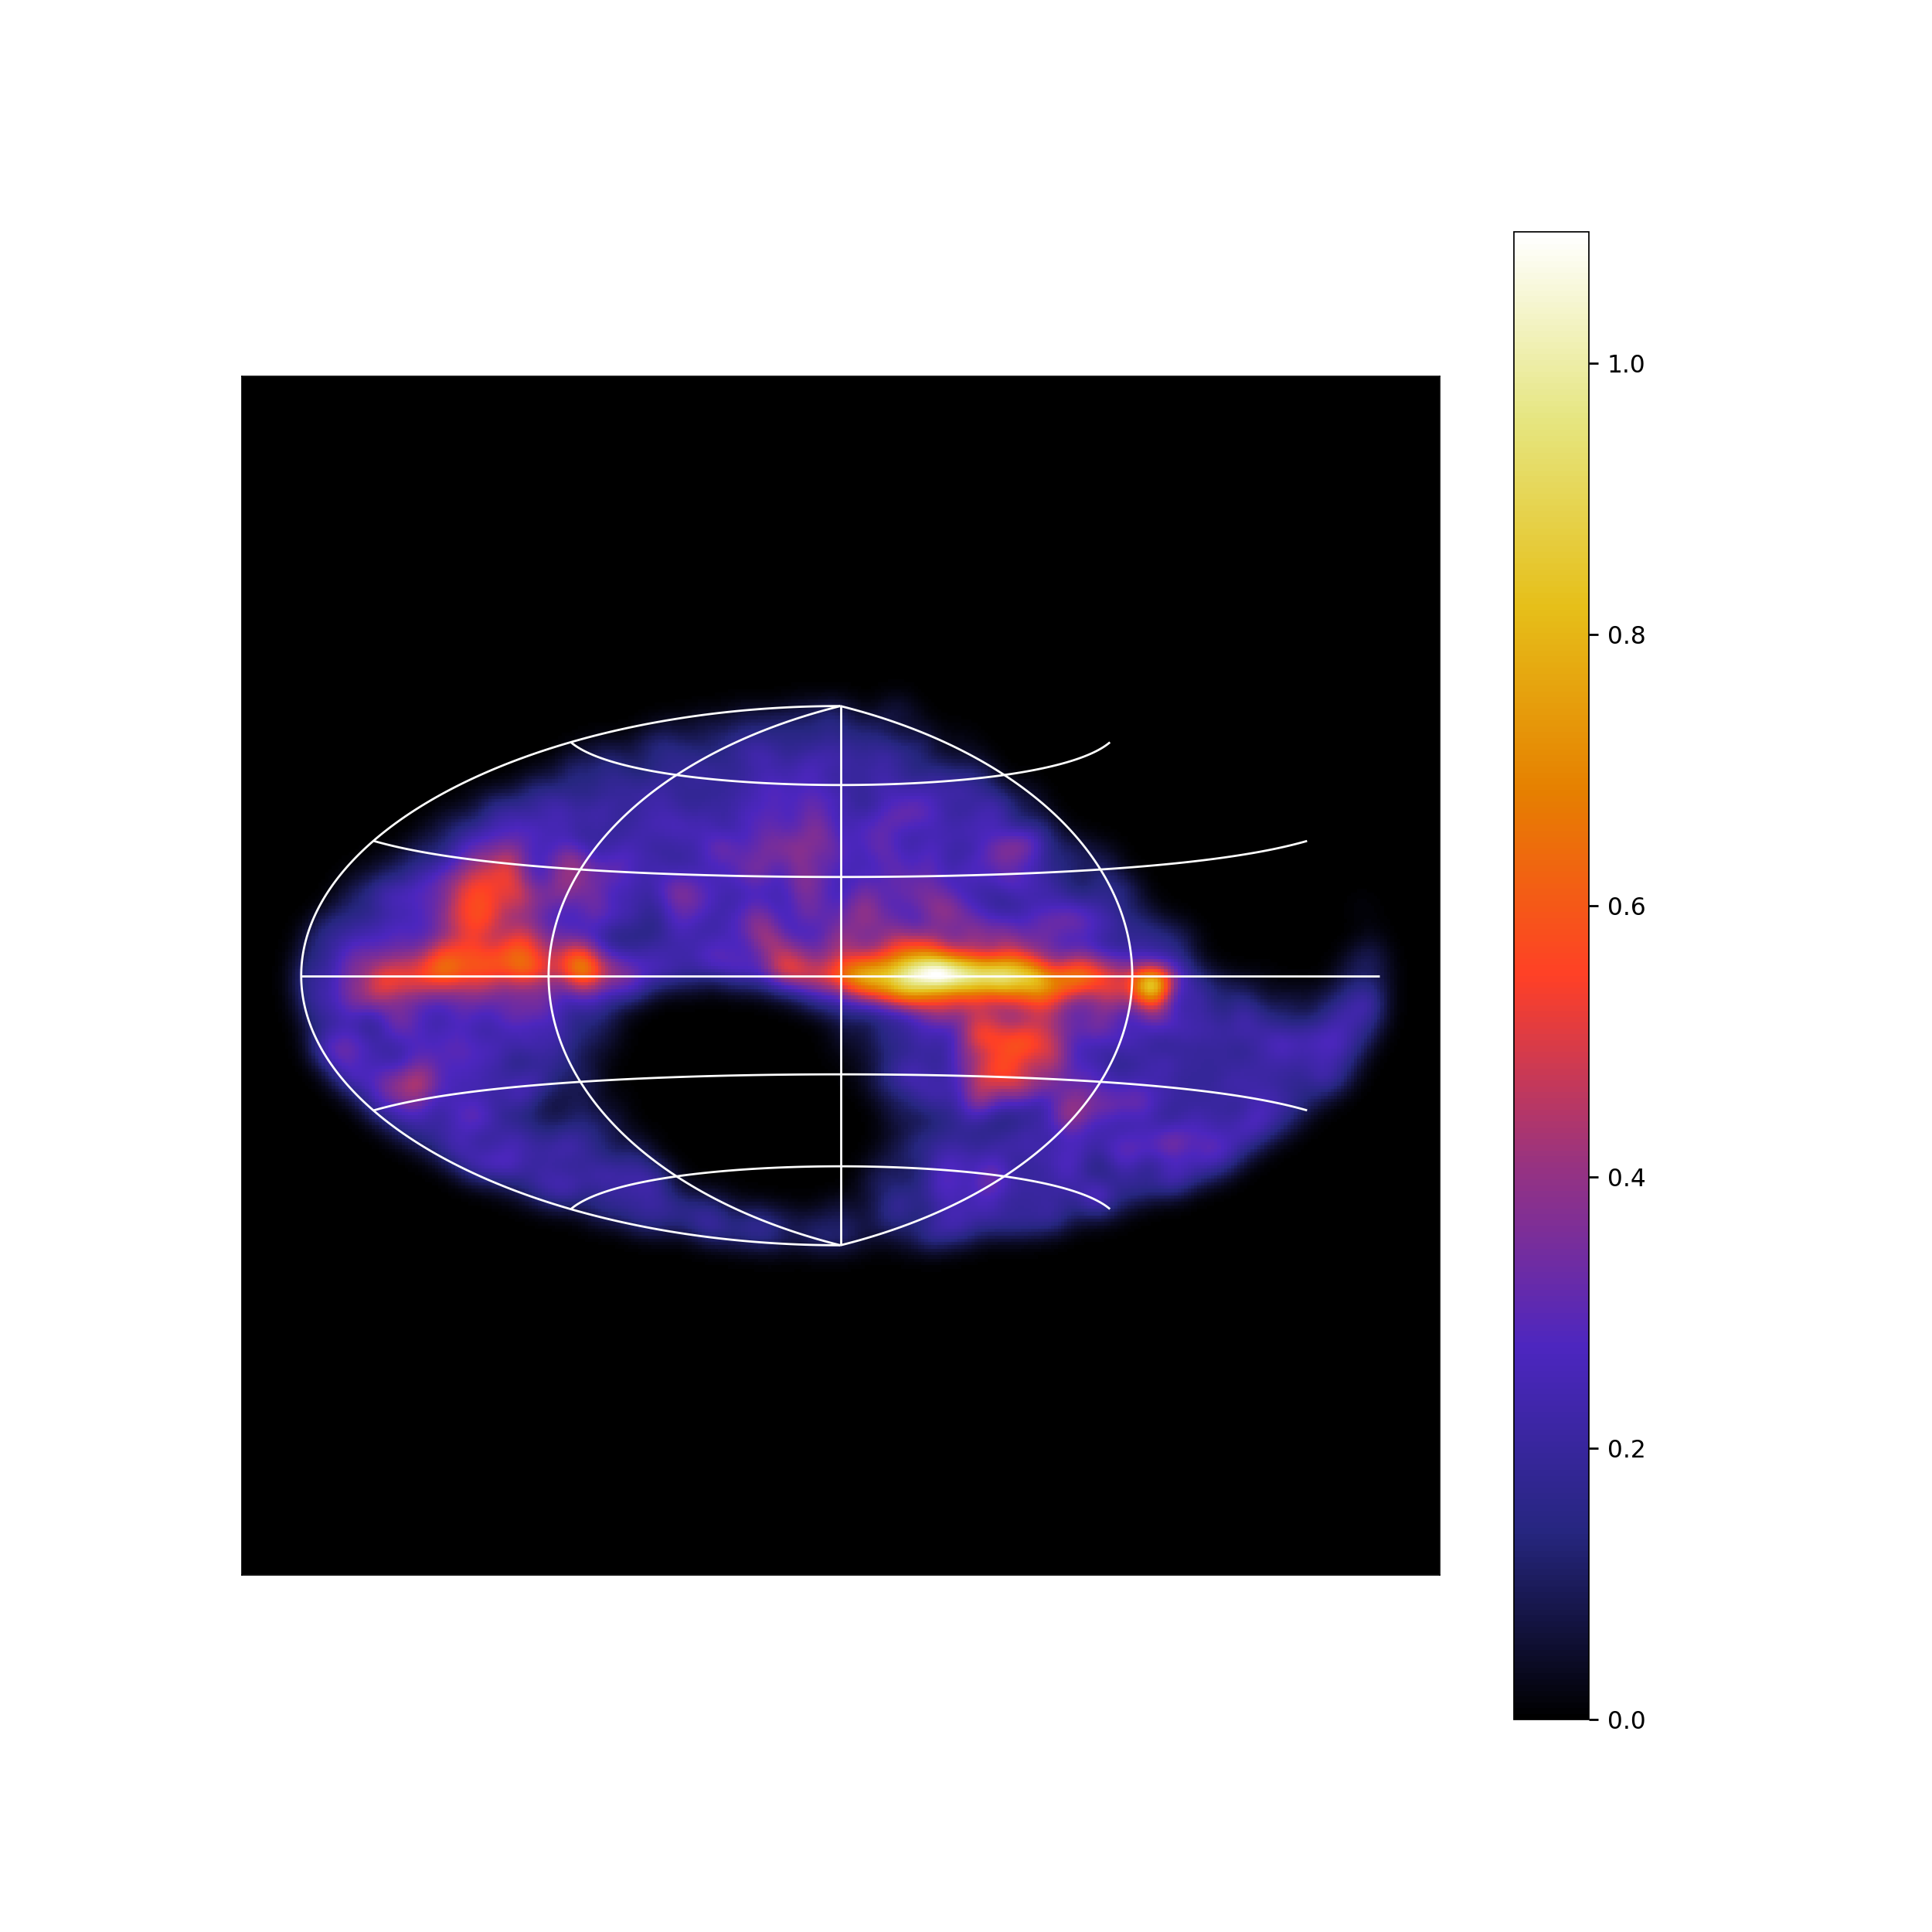

In [25]:
aga.displaySkyMap(cts_map, smooth=2)

<IPython.core.display.Javascript object>


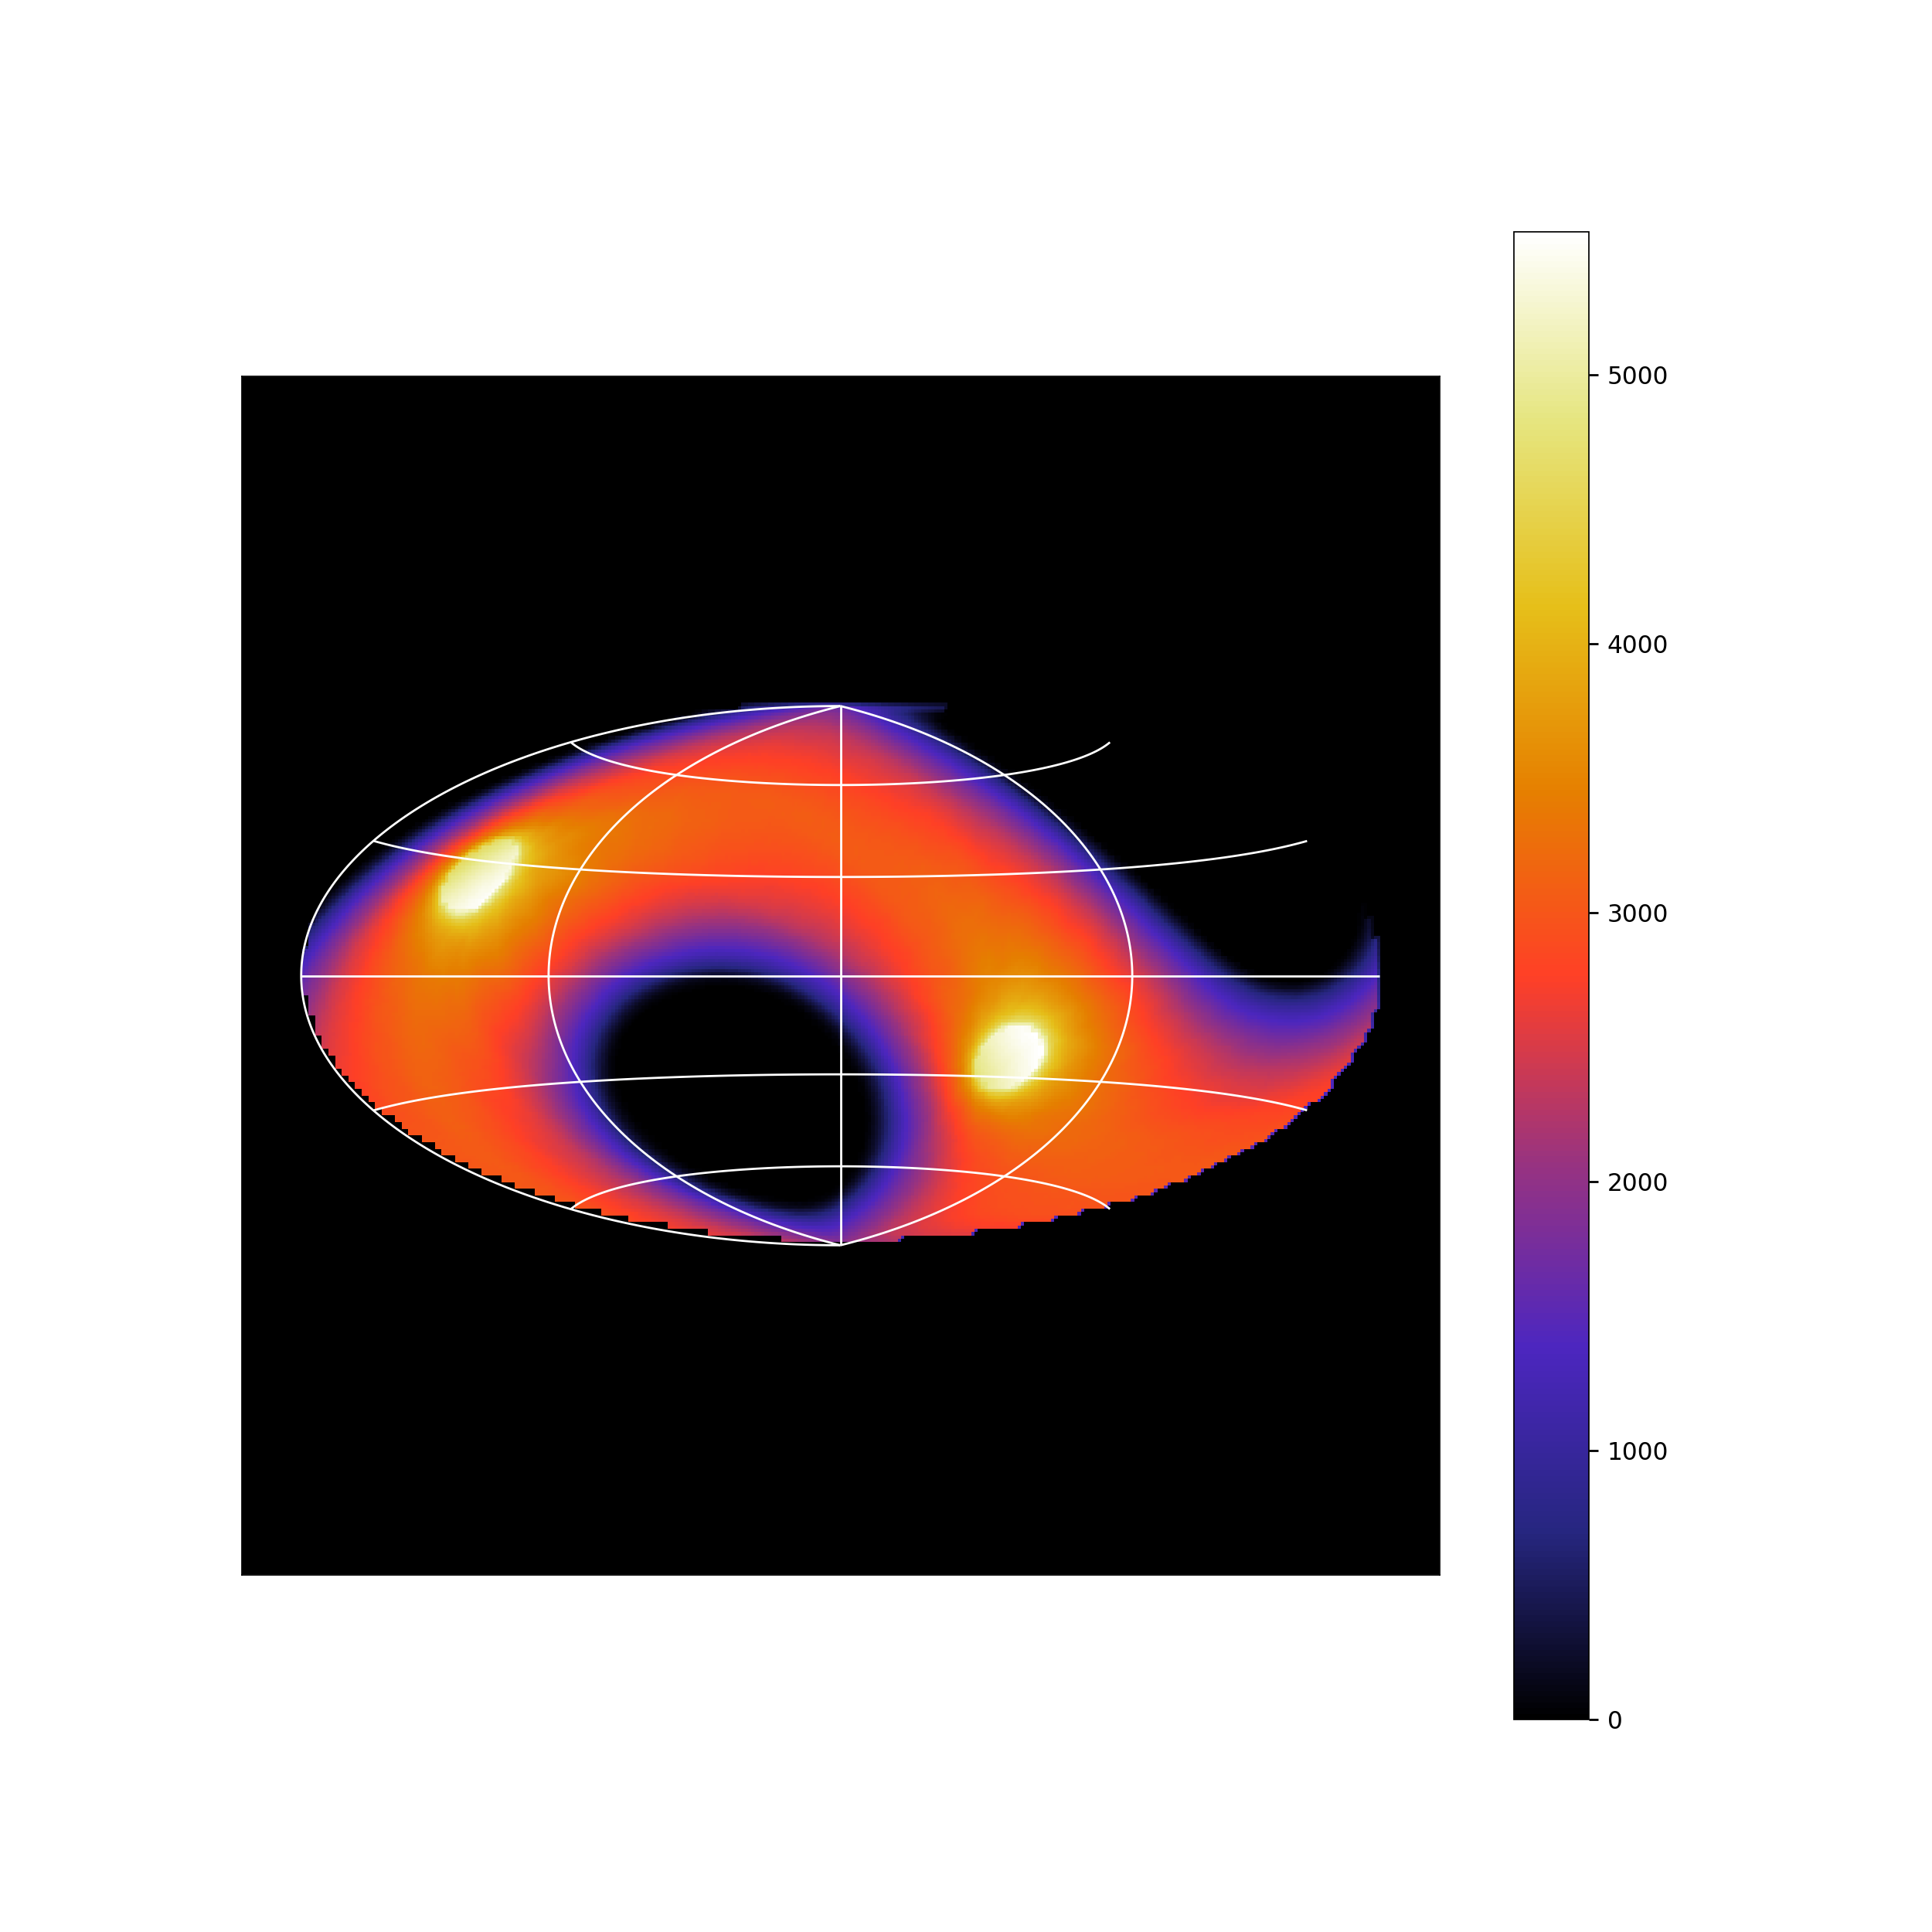

In [26]:
aga.displaySkyMap(exp_map)